In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json                     #permissions

In [ ]:
!kaggle datasets download -d muhammeddalkran/catvnoncat

catvnoncat.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
 !unzip /content/catvnoncat.zip


Archive:  /content/catvnoncat.zip
replace catvnoncat/test_catvnoncat.h5? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes
  inflating: catvnoncat/test_catvnoncat.h5  
replace catvnoncat/train_catvnoncat.h5? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes
  inflating: catvnoncat/train_catvnoncat.h5  


In [ ]:
%matplotlib inline
import h5py
import numpy as np
import matplotlib.pyplot as plt

LOAD DATA

In [ ]:
train_dataset = h5py.File('/content/catvnoncat/train_catvnoncat.h5', "r")
test_dataset = h5py.File('/content/catvnoncat/test_catvnoncat.h5', "r")

In [ ]:
list(train_dataset.keys())

['list_classes', 'train_set_x', 'train_set_y']

In [ ]:
list(train_dataset["list_classes"])

[b'non-cat', b'cat']

CONVERT H5PY DATA INTO NUMPYDATA

In [ ]:
#train set features
train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # features
#train set labels
train_set_y = np.array(train_dataset["train_set_y"][:]) #labels

In [ ]:
#test set features
test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # features
#test set labels
test_set_y = np.array(test_dataset["test_set_y"][:]) # labels

In [ ]:
print(train_set_x_orig.shape)
print(train_set_y.shape)

(209, 64, 64, 3)
(209,)


In [ ]:
print(test_set_x_orig.shape)
print(test_set_y.shape)

(50, 64, 64, 3)
(50,)


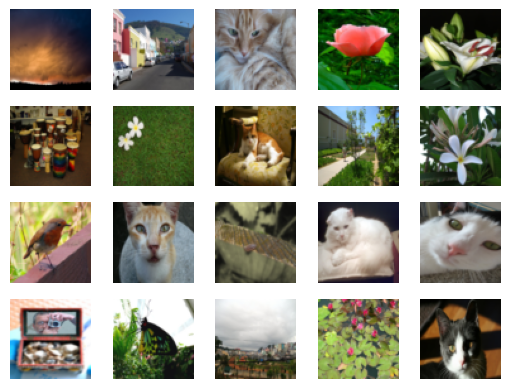

In [ ]:
for i in range (20):
  plt.subplot(4,5,i+1)
  plt.imshow(train_set_x_orig[i])
  plt.axis('off')

SETTING DATA AS PER MATRIX NOTATION

In [ ]:
m_train, num_px, num_py, nc = train_set_x_orig.shape
nx = num_px*num_py*nc
m_test = test_set_x_orig.shape[0]
print(m_train,nx,m_test)

209 12288 50


TRAIN AND TEST FEATURE MATRICES





In [ ]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T


TRAIN AND TEST OUTPUT LABEL

In [ ]:
train_set_y = train_set_y.reshape((1,train_set_y.shape[0]))
test_set_y = test_set_y.reshape((1,test_set_y.shape[0]))

NORMALIZE THE FEATURES

In [ ]:
train_set_x = train_set_x_flatten/255
test_set_x = test_set_x_flatten/255

In [ ]:
X_norm= train_set_x
y=train_set_y

In [ ]:
learning_rate=0.005
max_iteration=5000
cost=np.zeros((max_iteration))
w=np.zeros(nx).reshape(nx,1)
b=np.zeros(1).reshape(1,1)
for i in range(max_iteration):
  #linear output
  z=np.dot(w.T,X_norm)+b
  #sigmoid activation
  yhat=1/(1+np.exp(-z))
  #compute cost
  cost[i]= -np.sum((y*np.log(yhat)+(1-y)*np.log(1-yhat)),axis=1)/m_train
  #gradients
  dw=np.dot(X_norm,(yhat-y).T)/m_train
  db=(np.sum((yhat-y), dtype=np.float64))/m_train
      #update parameters
  w=w-learning_rate*dw
  b=b-learning_rate*db
print(cost[i])



0.06264299307363083


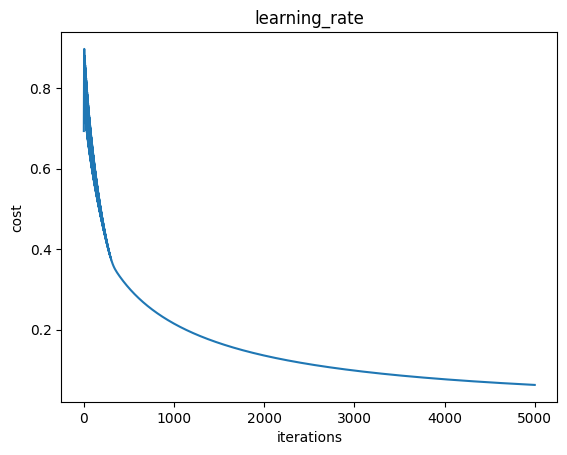

In [ ]:
plt.plot(cost)
plt.ylabel('cost')
plt.xlabel('iterations')
plt.title('learning_rate')
plt.show()

PREDICTIONS

In [ ]:
def predict(w,b,X,m_train):
  yhat=np.zeros((1,m_train))
  z=np.dot(w.T, X)+b
  a=1/(1+np.exp(-z))
  for i in range(m_train):
    if a[0,i] > 0.5:
      yhat[0,i]=1
    else:
      yhat[0,i]=0
  return yhat

In [ ]:
y_hat_train= predict(w,b,X_norm,m_train)

In [ ]:
y_hat_train

In [ ]:
train_set_y

array([[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
        0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
        1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
        1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
        0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
        0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]])

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
#show confusion_matrix(TN,FP,FN,TP)
cm = confusion_matrix(train_set_y.T, y_hat_train.T)

In [ ]:
TN,FP=cm[0]
FN,TP=cm[1]

In [ ]:
TN,FP,FN,TP

(137, 0, 0, 72)

In [ ]:
y_hat_test=predict(w,b,test_set_x/255,m_test)

In [ ]:
y_hat_test

array([[1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
        0., 0.]])

In [ ]:
cm=confusion_matrix(test_set_y.T,y_hat_test.T)

In [ ]:
cm

array([[15,  2],
       [29,  4]])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(test_set_y.T,y_hat_test.T)

0.38

BELOW CELLS ARE SCRAP OR WERE USED FOR TRIAL PURPOSE.DO NOT CONSIDER THEM AS PART OF THE CODE.THE CODE HAS ENDED.


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
train_set_x_flatten.shape


(12288, 209)

In [ ]:
lr = LogisticRegression(max_iter=1000)
lr.fit(train_set_x_flatten, train_set_y)

ValueError: ignored

In [ ]:
#show to coeficient and intercept
print(lr.coef_)
print(lr.intercept_)

In [ ]:
X_test=test_set_x_flatten/255
y_test=test_set_y

not in use

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [ ]:
def forward_prop(X,w,D,b):
  #forward propagation
  a = sigmoid(np.dot(w.T,X)+b)
  return a

In [ ]:
def output_cost(a,y,m):
  cost=-np.sum((y*np.log(a)+(1-y)*np.log(1-a)),axis=1)/m
  #np.squeeze remove axes of length one from an array
  cost = np.squeeze(np.array(cost))
  return cost

In [ ]:
def backward_prop(a,X,y,m):
  dw=np.dot(X,(a-y).T)/m
  db=(np.sum((a-y),dtype=np.float64))/m
  return dw,db

In [ ]:
def update_parameters(w,b,dw,db,learning_rate):
  w=w-learning_rate*dw
  b=b-learning_rate*db
  return w,b

In [ ]:
def model_LR(X_train, Y_train, X_test, Y_test, num_iterations=5000,learning_rate=0.005,print_cost=False):
  m=X_train.shape[1]
  w, b=np.zeros(X_train.shape[0]).reshape(X_train.shape[0],1),0.0
  costs = []

  for i in range(num_iterations):
    A= forward_prop(w,b,X_train,m)
    cost=output_cost(A,Y_train,m)
    dw, db = backward_prop(A,X_train,Y_train,m)
    w,b = update_parameters(w,b,dw,db,learning_rate)
    costs.append(cost)

    if print_cost:
      print("cost after iteration %i: %f" %(i,cost))
    params = {"w":w,"b":b}
    d = {"costs":costs,
            "w":params["w"],
            "b":params["b"],
            "learning_rate": learning_rate,
            "num_iterations": num_iterations}
    return d

In [ ]:
logistic_regression = model_LR(train_set_x, train_set_y,test_set_x,test_set_y)